In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1.1 Kernel Ridge Regression

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
data = pd.read_csv('Regression_dataset.csv')
data

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,Y
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [4]:
y = data['Y']
data = data.drop(columns='Y')

In [5]:
X = data.loc[:,]
X

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [6]:
# X = StandardScaler().fit_transform(X)
X = np.asarray(X,dtype=np.float)
y = np.asarray(y,dtype=np.float)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(404, 13)
(102, 13)


In [8]:
def linear_kernel(X,Y):
    assert X.shape[1] == Y.shape[1]
    K = np.matmul(X,Y.T)
    return K

def polynomial_kernel(X,Y,degree=3,gamma=None,a=1):
    assert X.shape[1] == Y.shape[1]
    if gamma is None:
        gamma = 1./X.shape[1]
    K = np.matmul(X,Y.T)
    K *= gamma
    K += a
    K **= degree
    return K

In [9]:
X_train

array([[7.25800e-01, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
        3.90950e+02, 1.12800e+01],
       [3.77498e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        2.20100e+01, 1.71500e+01],
       [2.19770e-01, 0.00000e+00, 6.91000e+00, ..., 1.79000e+01,
        3.96900e+02, 1.62000e+01],
       ...,
       [3.52330e-01, 0.00000e+00, 2.18900e+01, ..., 2.12000e+01,
        3.94080e+02, 1.45900e+01],
       [2.22120e-01, 0.00000e+00, 1.00100e+01, ..., 1.78000e+01,
        3.96900e+02, 1.70900e+01],
       [2.92400e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        2.40160e+02, 9.81000e+00]])

In [10]:
def KernelRidgeRegression(X_train,y_train,X_test,y_test,\
                   kernel='linear',\
                   degree=3,\
                   gamma=None,\
                   a=1,\
                   lambda_=1):
    if kernel == 'linear':
        K = linear_kernel(X_train,X_train)
    elif kernel == 'poly':
        K = polynomial_kernel(X_train,X_train,degree=degree,gamma=gamma,a=a)
    else:
        print('Invalid Kernel !')
        return
    alpha = np.matmul(np.linalg.inv(K+lambda_*np.eye(K.shape[0])),y_train)
    if kernel == 'linear':
        h = linear_kernel(X_train,X_test)
    elif kernel == 'poly':
        h = polynomial_kernel(X_train,X_test,degree=degree,gamma=gamma,a=a)

    y_preds = np.matmul(alpha.T,h)
    y_train_preds = np.matmul(alpha.T,K)
    return y_preds, np.linalg.norm(y_test-y_preds)**2/y_test.shape[0],np.linalg.norm(y_train-y_train_preds)**2/y_train.shape[0]

In [11]:
lambda_list = np.logspace(-4,4,9)
for lambda_ in lambda_list:
    y_pred, te_error, tr_error = KernelRidgeRegression(X_train,y_train,X_test,y_test,kernel='linear',lambda_=lambda_)
    print('lambda: {}, Test Error:{:.6f}, Train Error:{:.6f}'.format(lambda_,te_error, tr_error))

lambda: 0.0001, Test Error:20.016011, Train Error:25.428329
lambda: 0.001, Test Error:20.016586, Train Error:25.428385
lambda: 0.01, Test Error:20.017645, Train Error:25.428395
lambda: 0.1, Test Error:20.027810, Train Error:25.428438
lambda: 1.0, Test Error:20.109689, Train Error:25.430816
lambda: 10.0, Test Error:20.612014, Train Error:25.493740
lambda: 100.0, Test Error:24.408900, Train Error:27.185513
lambda: 1000.0, Test Error:38.402728, Train Error:39.518643
lambda: 10000.0, Test Error:50.859324, Train Error:54.871092


In [12]:
lambda_list = np.logspace(-4,4,9)
degree_list = np.arange(5)
for degree in degree_list:
    for lambda_ in lambda_list:
        y_pred, te_error, tr_error = KernelRidgeRegression(X_train,y_train,X_test,y_test,\
                                                    kernel='poly',lambda_=lambda_,degree=degree)
        print('degree: {}, lambda: {}, Test Error:{:.6f}, Train Error:{:.6f}'.format(degree,lambda_,te_error, tr_error))
    print('-'*50)

degree: 0, lambda: 0.0001, Test Error:89.494674, Train Error:83.138227
degree: 0, lambda: 0.001, Test Error:89.494675, Train Error:83.138227
degree: 0, lambda: 0.01, Test Error:89.494691, Train Error:83.138227
degree: 0, lambda: 0.1, Test Error:89.494877, Train Error:83.138258
degree: 0, lambda: 1.0, Test Error:89.499481, Train Error:83.141321
degree: 0, lambda: 10.0, Test Error:89.807579, Train Error:83.434376
degree: 0, lambda: 100.0, Test Error:109.614813, Train Error:103.120728
degree: 0, lambda: 1000.0, Test Error:347.488450, Train Error:340.637920
degree: 0, lambda: 10000.0, Test Error:559.093834, Train Error:552.070632
--------------------------------------------------
degree: 1, lambda: 0.0001, Test Error:20.266274, Train Error:22.601643
degree: 1, lambda: 0.001, Test Error:20.258294, Train Error:22.601791
degree: 1, lambda: 0.01, Test Error:20.198691, Train Error:22.614377
degree: 1, lambda: 0.1, Test Error:20.185580, Train Error:22.953497
degree: 1, lambda: 1.0, Test Error:20

# Kernel SVM

In [13]:
data = pd.read_csv('Dataset_3_Team_32.csv')
data

,# x_1,x_2,Class_label
0,0.035054,-0.716012,1
1,-0.196325,0.525494,1
2,0.178779,0.941999,0
3,0.888123,-0.115124,0
4,-0.272846,-0.925358,0
...,...,...,...
995,-1.007131,0.164826,0
996,-0.336599,0.509190,1
997,0.518864,-0.933628,0
998,-1.105949,0.092383,0


In [14]:
y = data['Class_label']
X = data.drop(columns='Class_label')
X

,# x_1,x_2
0,0.035054,-0.716012
1,-0.196325,0.525494
2,0.178779,0.941999
3,0.888123,-0.115124
4,-0.272846,-0.925358
...,...,...
995,-1.007131,0.164826
996,-0.336599,0.509190
997,0.518864,-0.933628
998,-1.105949,0.092383


In [15]:
X = np.asarray(X,dtype=np.float)
y = np.asarray(y,dtype=np.float)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(800, 2)
(200, 2)


In [17]:
from sklearn.svm import SVC
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))

0.53875
0.46


In [18]:
for i in range(10):
    clf = SVC(gamma='auto',kernel='poly',degree=i)
    clf.fit(X_train, y_train)
    print(i, clf.score(X_train,y_train), clf.score(X_test,y_test), clf.n_support_)

0 0.50125 0.495 [399 399]
1 0.5425 0.465 [393 393]
2 0.985 0.985 [117 116]
3 0.63 0.585 [397 397]
4 0.96125 0.975 [190 190]
5 0.505 0.495 [399 399]
6 0.83375 0.87 [322 322]
7 0.50125 0.495 [399 399]
8 0.575 0.555 [395 394]
9 0.50125 0.495 [399 399]


# Kernel Logistic Regression

# Soft margin SVM

In [19]:
data = pd.read_csv('Dataset_2_Team_32.csv')
data

,# x_1,x_2,Class_label
0,0.692861,0.556588,0
1,0.400311,0.276177,1
2,0.330683,0.919995,0
3,2.188335,0.624647,1
4,0.952366,-0.331363,1
...,...,...,...
995,-1.093743,0.657696,0
996,1.402559,-0.386738,1
997,-0.151178,1.287169,0
998,2.093943,0.482662,1


In [20]:
y = data['Class_label']
X = data.drop(columns='Class_label')
X

,# x_1,x_2
0,0.692861,0.556588
1,0.400311,0.276177
2,0.330683,0.919995
3,2.188335,0.624647
4,0.952366,-0.331363
...,...,...
995,-1.093743,0.657696
996,1.402559,-0.386738
997,-0.151178,1.287169
998,2.093943,0.482662


In [21]:
X = np.asarray(X,dtype=np.float)
y = np.asarray(y,dtype=np.float)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(800, 2)
(200, 2)


In [23]:
from sklearn.svm import SVC
clf = SVC(kernel='linear',C=1)
clf.fit(X_train, y_train)
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))

0.86625
0.87


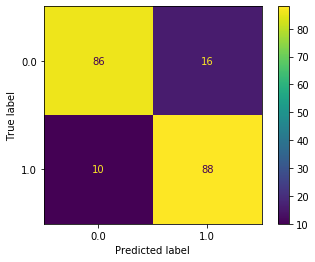

In [24]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test)
plt.show()

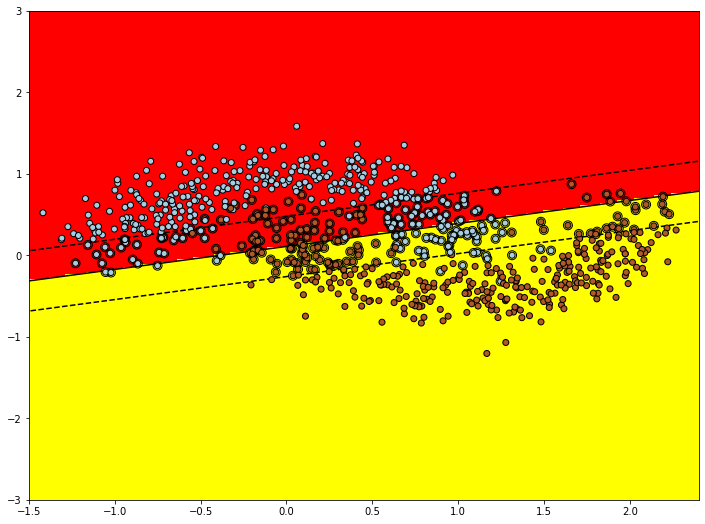

In [25]:
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-2.5, 2.5)
yy = a * xx - (clf.intercept_[0]) / w[1]

    # plot the parallels to the separating hyperplane that pass through the
    # support vectors (margin away from hyperplane in direction
    # perpendicular to hyperplane). This is sqrt(1+a^2) away vertically in
    # 2-d.
margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin

    # plot the line, the points, and the nearest vectors to the plane
plt.figure(0,figsize=(12,9))
plt.clf()
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
                facecolors='none', zorder=10, edgecolors='k')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, zorder=10, cmap=plt.cm.Paired,
                edgecolors='k')

plt.axis('tight')
x_min = -1.5
x_max = 2.4
y_min = -3
y_max = 3

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
Z = Z.reshape(XX.shape)
plt.figure(0,figsize=(12,9))
plt.pcolormesh(XX, YY, Z, cmap=plt.cm.autumn)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()

In [26]:
sv = clf.support_vectors_
wt = clf.coef_
b = clf.intercept_
np.sum(np.abs(np.matmul(sv,wt.T)+b) <= 0.01)
# b

4

In [27]:
print(clf.predict(X_train)[:10])
print(clf.decision_function(X_train)[:10]) # np.matmul(X_train[:10],wt.T)+b

[0. 1. 0. 1. 0. 1. 0. 0. 1. 0.]
[-2.95345354e+00  2.33982093e+00 -5.65749698e-01  1.63260813e+00
 -1.84285796e+00  3.92958034e-04 -1.23007877e+00 -8.71874409e-01
  2.84223594e+00 -3.78318224e-01]


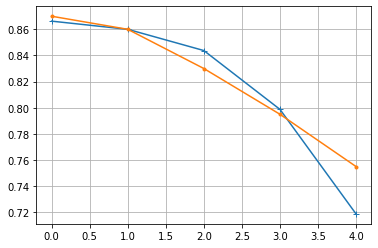

In [28]:
tr_res, te_res = [], []
for i in range(5):
    clf = SVC(kernel='linear',class_weight={0:1,1:2**i})
    clf.fit(X_train, y_train)
    tr_res.append(clf.score(X_train,y_train))
    te_res.append(clf.score(X_test,y_test))
plt.plot(np.arange(5),tr_res,'-+')
plt.plot(np.arange(5),te_res,'.-')
plt.grid()
plt.show()

#  Kernel Perceptron

In [204]:
data = pd.read_csv('Dataset_1_Team_32.csv')
data

,# x_1,x_2,Class_label
0,11.436219,-551.352490,0
1,19.075611,-428.665098,0
2,11.319844,-549.019505,0
3,-73.915526,144.168500,1
4,-80.128340,191.084579,1
...,...,...,...
995,-80.827256,253.494963,1
996,9.436588,-655.435438,0
997,10.630824,-589.611606,0
998,18.818856,-393.674722,0


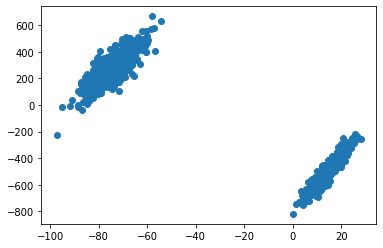

In [205]:
plt.scatter(data['# x_1'],data['x_2'])

In [206]:
data['Class_label'] = np.sign(data['Class_label']-0.5)
y = data['Class_label']
X = data.drop(columns='Class_label')
X

,# x_1,x_2
0,11.436219,-551.352490
1,19.075611,-428.665098
2,11.319844,-549.019505
3,-73.915526,144.168500
4,-80.128340,191.084579
...,...,...
995,-80.827256,253.494963
996,9.436588,-655.435438
997,10.630824,-589.611606
998,18.818856,-393.674722


In [207]:
X = np.asarray(X,dtype=np.float)
y = np.asarray(y,dtype=np.float)

In [208]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(800, 2) (800,)
(200, 2) (200,)


In [209]:
def KernelPerceptron(X_train,y_train,X_test,y_test,\
                     kernel='linear',\
                     degree=3,\
                     gamma=None,\
                     a=1):
    T = X_train.shape[0]
    alpha = np.zeros(T)
    if kernel == 'linear':
        for t in range(T):
            X_t = np.reshape(X_train[t],(1,2))
            h = linear_kernel(X_train,X_t)
            y_t_hat = np.sign(np.matmul((alpha*y_train).T,h))
            if y_train[t] != y_t_hat:
                alpha[t] += 1
        h = linear_kernel(X_train,X_test)
        y_test_preds = np.sign(np.matmul((alpha*y_train).T,h))
        h = linear_kernel(X_train,X_train)
        y_train_preds = np.sign(np.matmul((alpha*y_train).T,h))
        
    elif kernel == 'poly':
        for t in range(T):
            X_t = np.reshape(X_train[t],(1,2))
            h = polynomial_kernel(X_train,X_t,degree=degree,gamma=gamma,a=a)
            y_t_hat = np.sign(np.matmul((alpha*y_train).T,h))
            if y_train[t] != y_t_hat:
                alpha[t] += 1
        h = polynomial_kernel(X_train,X_test,degree=degree,gamma=gamma,a=a)
        y_test_preds = np.sign(np.matmul((alpha*y_train).T,h))
        h = polynomial_kernel(X_train,X_train,degree=degree,gamma=gamma,a=a)
        y_train_preds = np.sign(np.matmul((alpha*y_train).T,h))
    
    else:
        print('Invalid Kernel !')
        return
        
    return alpha, np.mean(y_test == y_test_preds), np.mean(y_train == y_train_preds)

In [210]:
def predict_poly(alpha,X,Y,y,degree=2,gamma=None,a=1):
    h = polynomial_kernel(X,Y,degree=degree,gamma=gamma,a=a)
    return np.sign(np.matmul((alpha*y).T,h))

def predict_linear(alpha,X,Y,y):
    h = linear_kernel(X,Y)
    return np.sign(np.matmul((alpha*y).T,h))    

In [230]:
alpha,te_acc,tr_acc = KernelPerceptron(X_train,y_train,X_test,y_test,kernel='poly',degree=2)
print('test accuracy: {}, train accuracy: {}'.format(te_acc,tr_acc))

test accuracy: 0.975, train accuracy: 0.95125


In [231]:
X_train.shape

(800, 2)

No handles with labels found to put in legend.


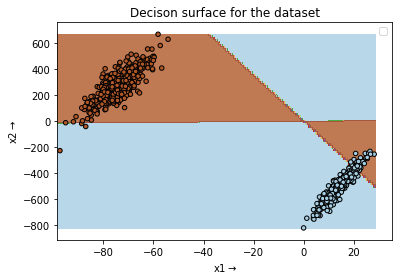

In [239]:
def make_meshgrid(x, y, h=1):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, alpha1, y, xx, yy, **params):
    X = np.c_[xx.ravel(), yy.ravel()]
    Z = predict_poly(alpha1,X_train,X,y,degree=2)
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots()
# Set-up grid for plotting.
X0, X1 = X_train[:, 0], X_train[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, alpha,y_train, xx, yy, cmap=plt.cm.Paired, alpha=0.8)
ax.scatter(X0, X1, c=y_train, cmap=plt.cm.Paired, s=20, edgecolors='k')
ax.set_ylabel(r'x2$\rightarrow$')
ax.set_xlabel(r'x1$\rightarrow$')
# ax.set_xticks(())
# ax.set_yticks(())
ax.set_title('Decison surface for the dataset')
ax.legend()
plt.show()